Here I'll make a simulation for the shuttling in the 0.5mm trap. 
There are 3 sets of electrodes (Endcaps x1, DC x2, Bias x2).
From the COMSOL simulation, we got 3 sets of arrays - the voltage across the axial axis due to 1V of each set of electrodes, while all the other are grounded. 
Now, we want to see which confinements can we build (and how much voltage do we need) in order to perform the steps of the shuttling process:
1. All in center
2. One in center, one aside (x2, but it's symmetric)
3. One center/aside, one out

First, we need to process the the arrays such that all the 'x' points (or z) sit on the same place. If it's not how COMSOL did it from the first place, we'll use extrapolation to make it so.

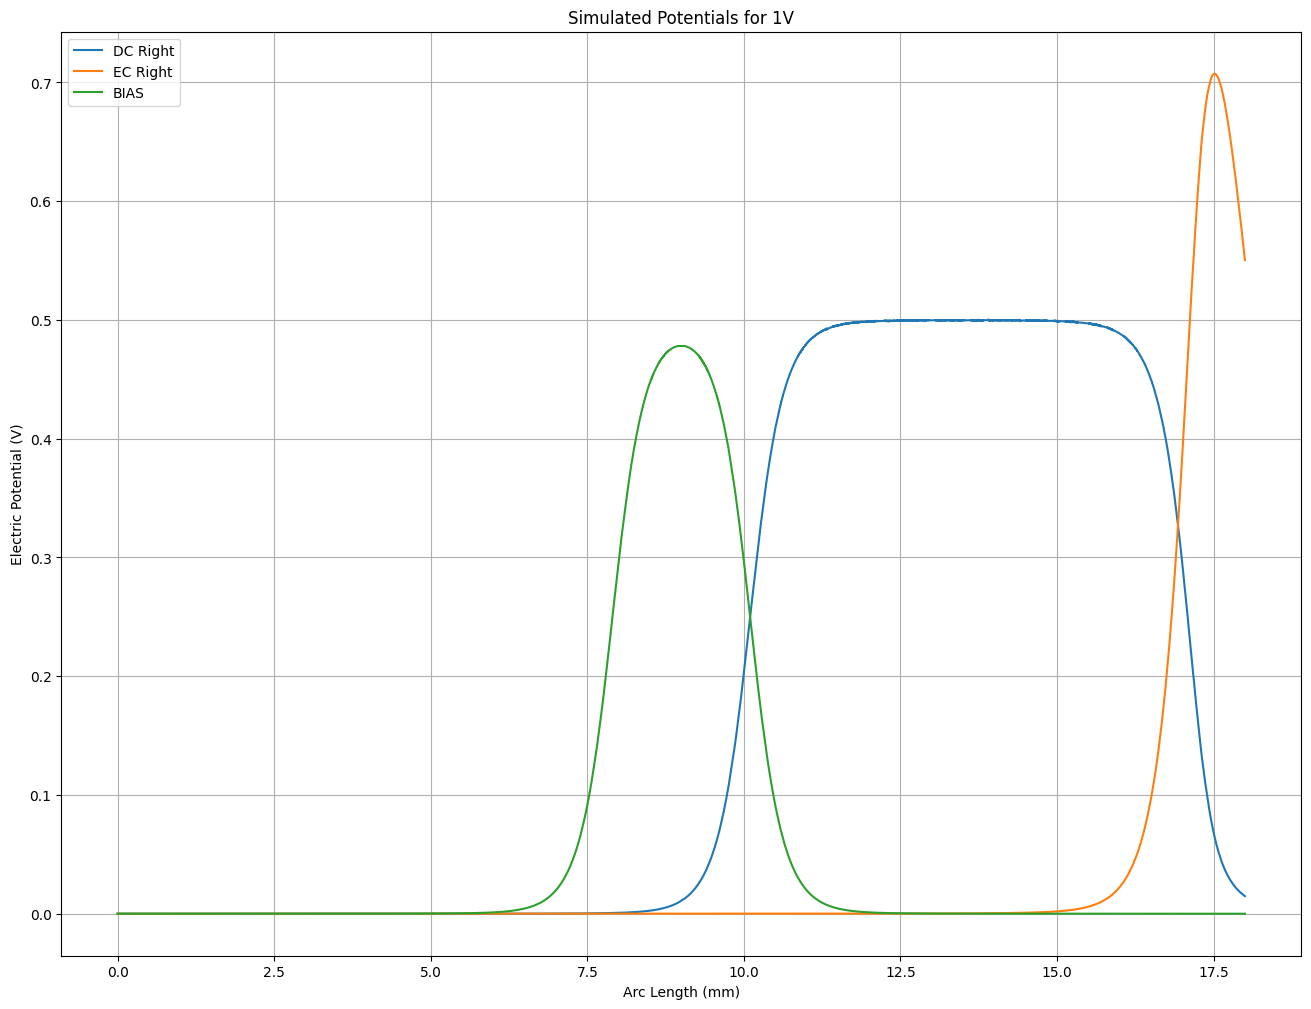

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os


# Get the absolute path of the current script
script_dir = os.getcwd()

# Construct absolute paths for the files
file_EC = os.path.join(script_dir, 'electrodes responses\Shuttling Endcap Smoothed.txt')
file_DC = os.path.join(script_dir, 'electrodes responses\Shuttling DC Smoothed.txt')
file_BIAS = os.path.join(script_dir, 'electrodes responses\Shuttling BIAS Smoothed.txt')

# Load the data using the absolute paths
data_EC = np.loadtxt(file_EC, skiprows=8)
data_DC = np.loadtxt(file_DC, skiprows=8)
data_BIAS = np.loadtxt(file_BIAS, skiprows=8)

# Reading the data and extracting columns
arc_length_EC = data_EC[:, 0]
electric_potential_EC_R = data_EC[:, 1]
electric_potential_EC_L = electric_potential_EC_R[::-1]

arc_length_DC = data_DC[:, 0]
electric_potential_DC_R = data_DC[:, 1]
electric_potential_DC_L = electric_potential_DC_R[::-1]

arc_length_BIAS = data_BIAS[:, 0]
electric_potential_BIAS = data_BIAS[:, 1]

# Plot the data
plt.figure(figsize=(16, 12))
plt.plot(arc_length_DC, electric_potential_DC_R, label='DC Right')
plt.plot(arc_length_EC, electric_potential_EC_R, label='EC Right')
plt.plot(arc_length_BIAS, electric_potential_BIAS, label='BIAS')
plt.title('Simulated Potentials for 1V')
plt.xlabel('Arc Length (mm)')
plt.ylabel('Electric Potential (V)')
plt.legend()
plt.grid(True)
plt.show()



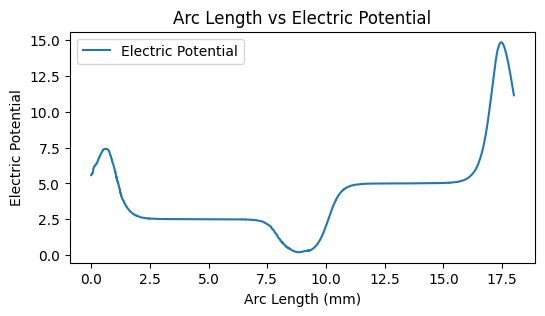

In [18]:
# Checked it, they all have ethe same x-axis, so I can plot them all on the same graph
# Now, let's build up potential

# we define a function that takes the voltage on each electrodes and plots the potential
# we also need to make a symmetric potential for DC and EC
def set_potential(V_EC_L,V_DC_L,V_BIAS,V_DC_R,V_EC_R):
    total_potential = V_EC_R*electric_potential_EC_R + V_EC_L*electric_potential_EC_L + V_DC_R*electric_potential_DC_R + V_DC_L*electric_potential_DC_L + V_BIAS*electric_potential_BIAS
    plt.figure(figsize=(6, 3))
    plt.plot(arc_length_DC, total_potential, label='Electric Potential')
    plt.title('Arc Length vs Electric Potential')
    plt.xlabel('Arc Length (mm)')
    plt.ylabel('Electric Potential')
    plt.legend()

# Now we can call the function with the desired voltages
set_potential(V_EC_L=10,V_DC_L=5,V_BIAS=0,V_DC_R=10,V_EC_R=20)

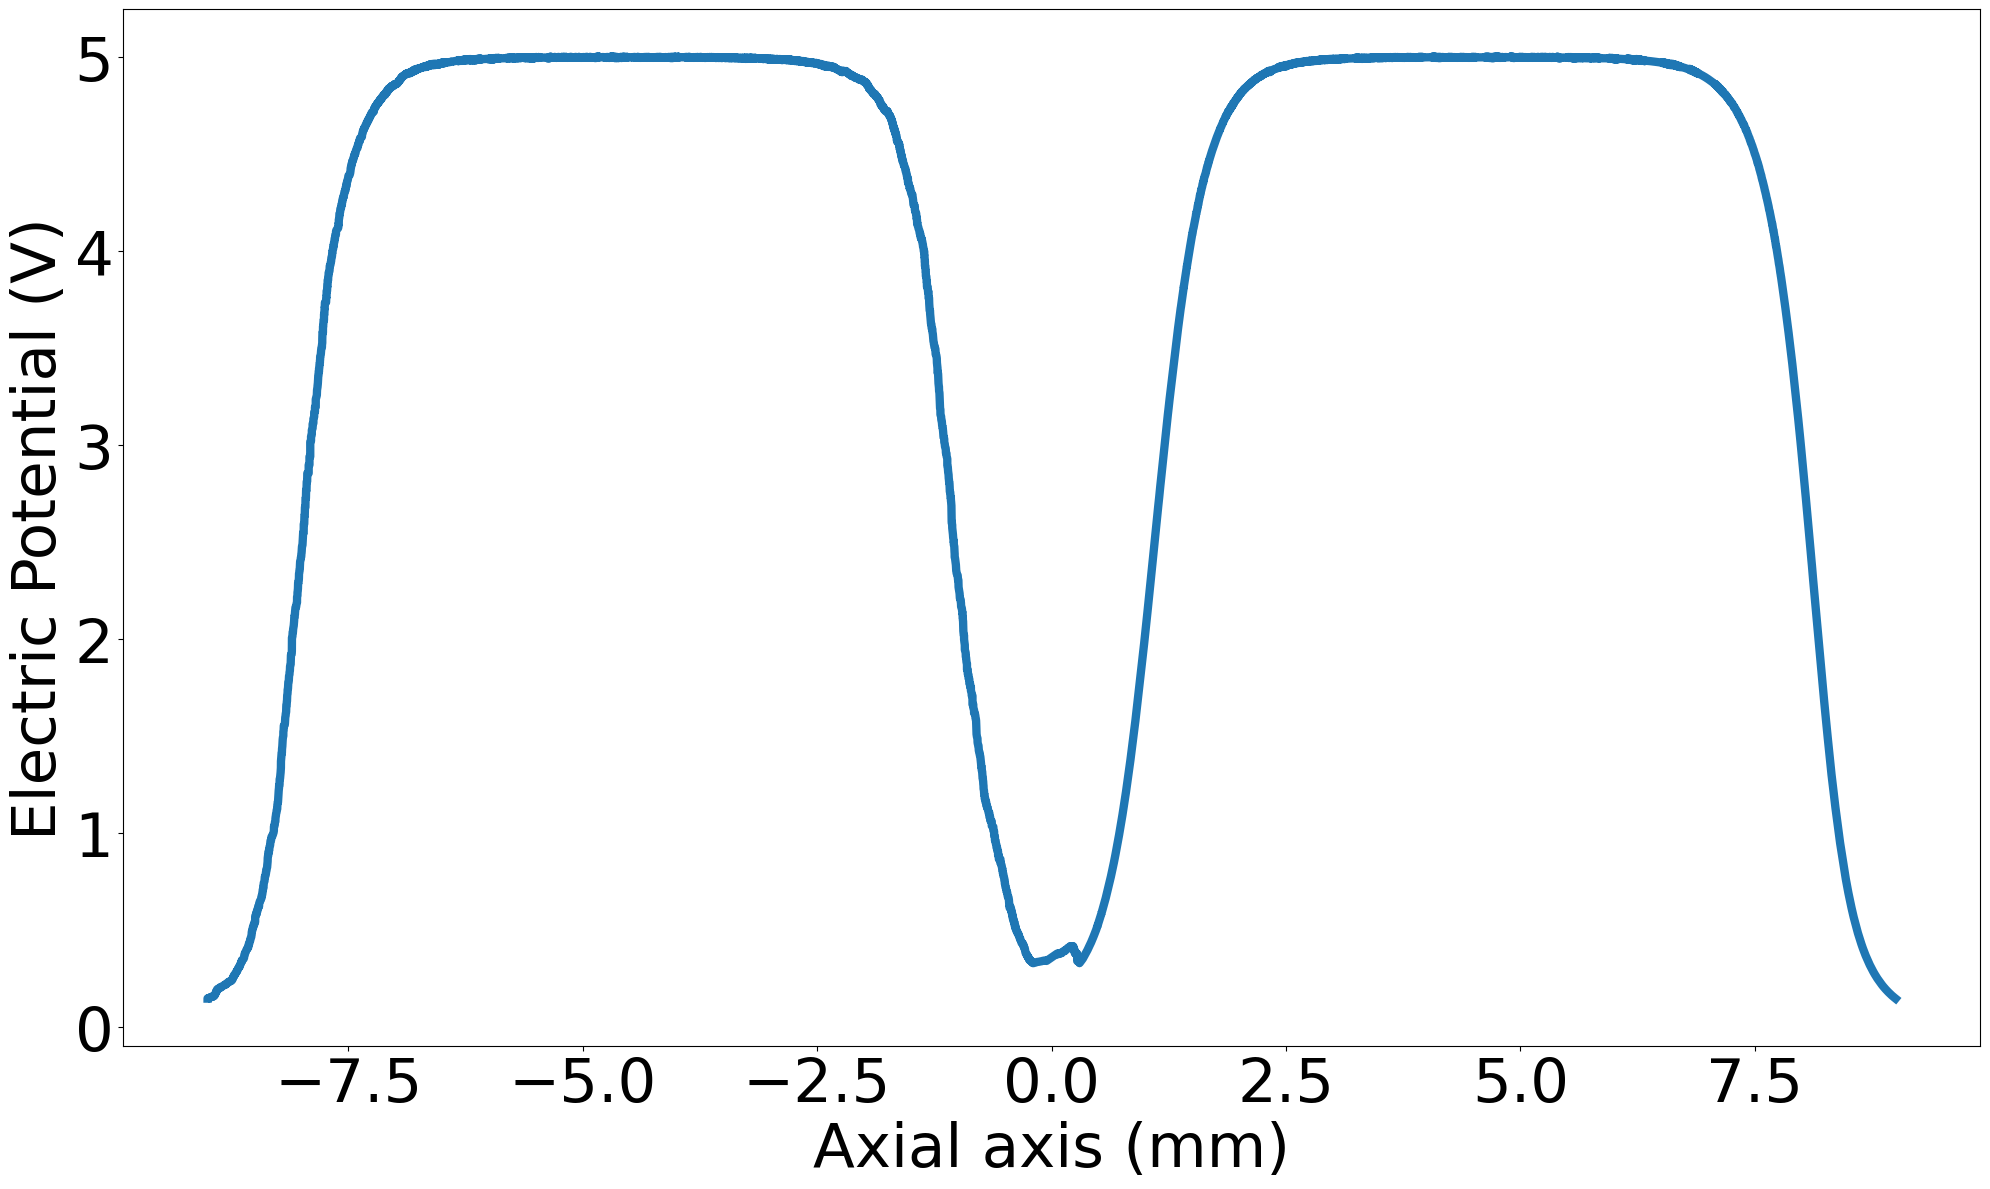

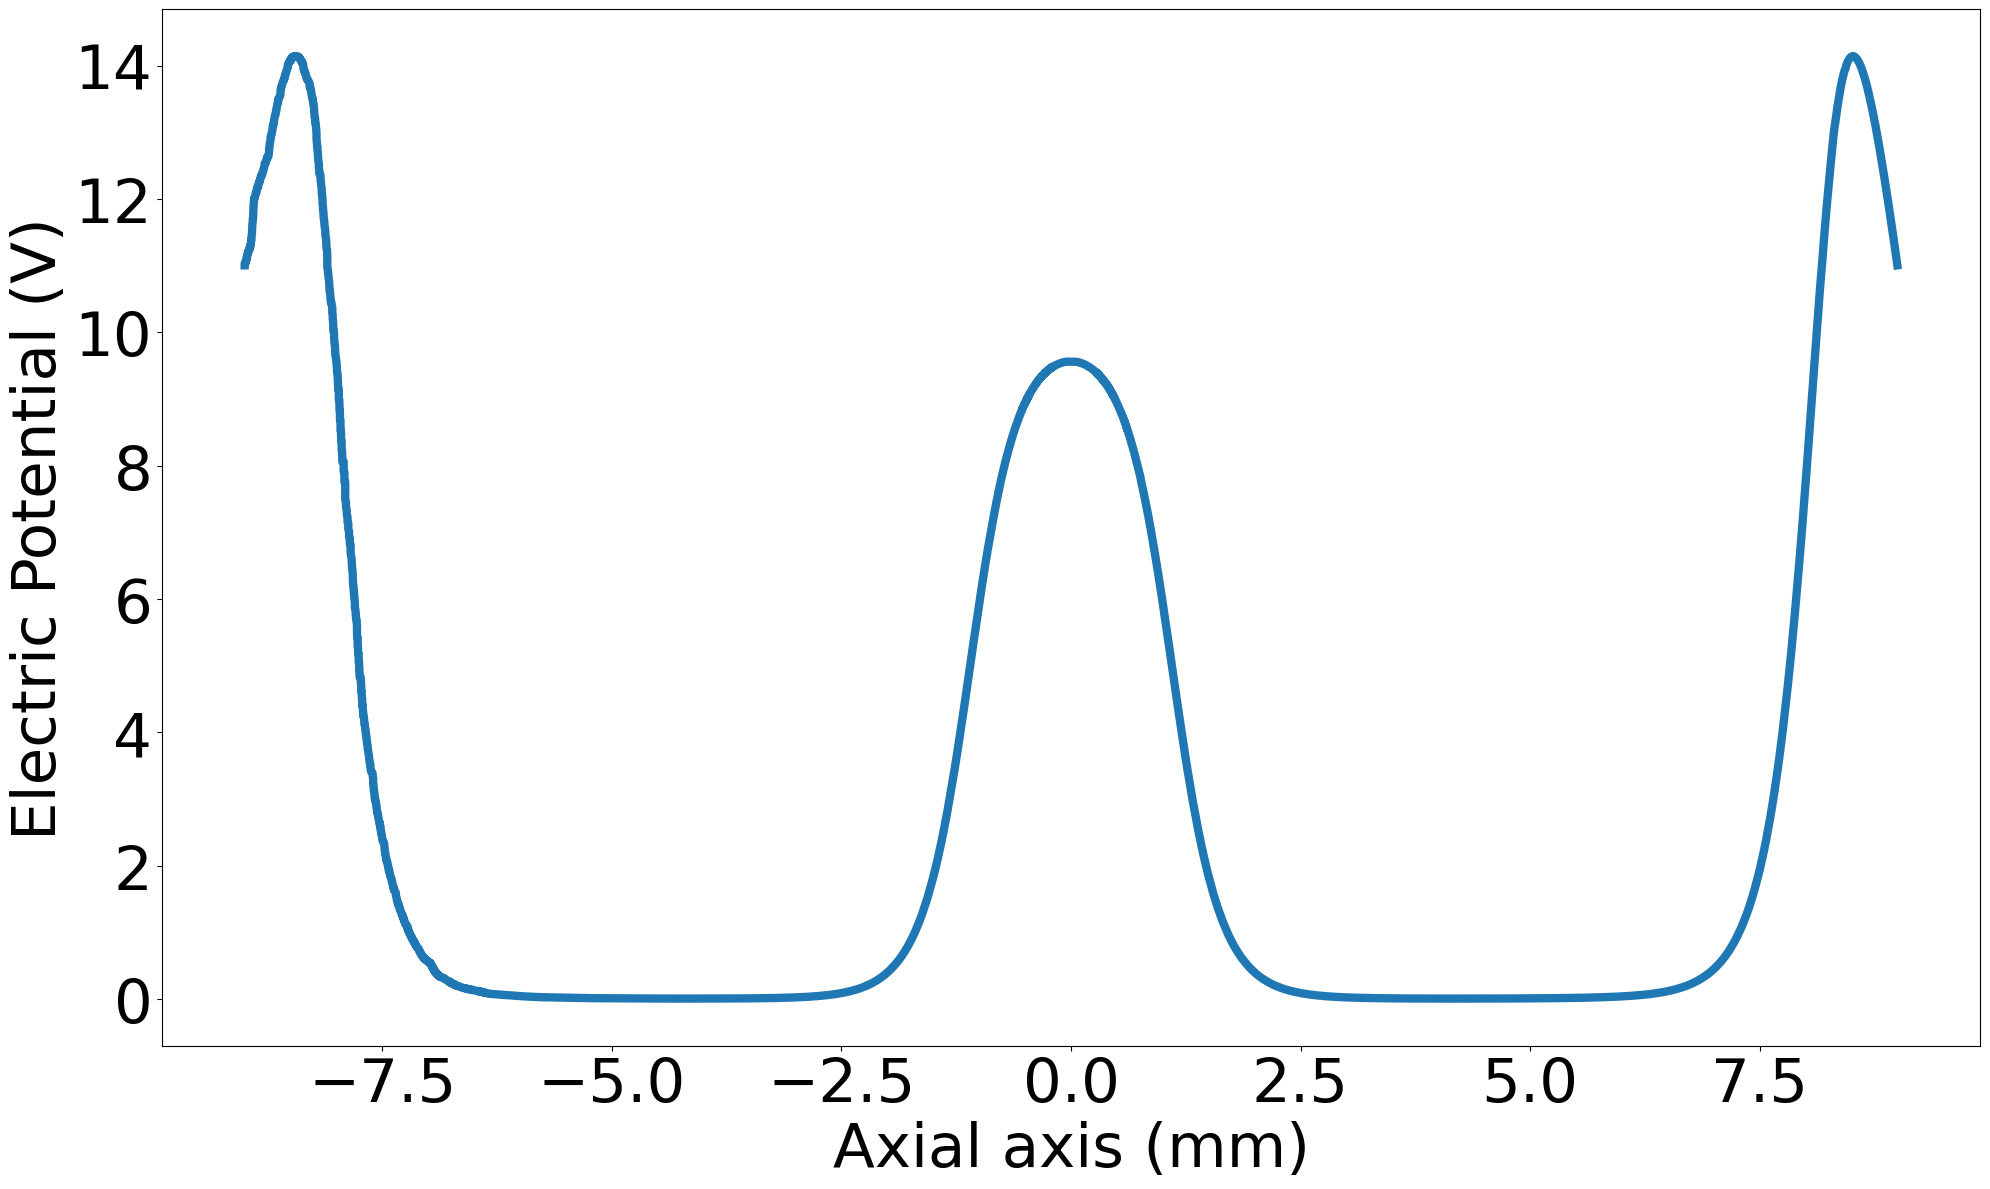

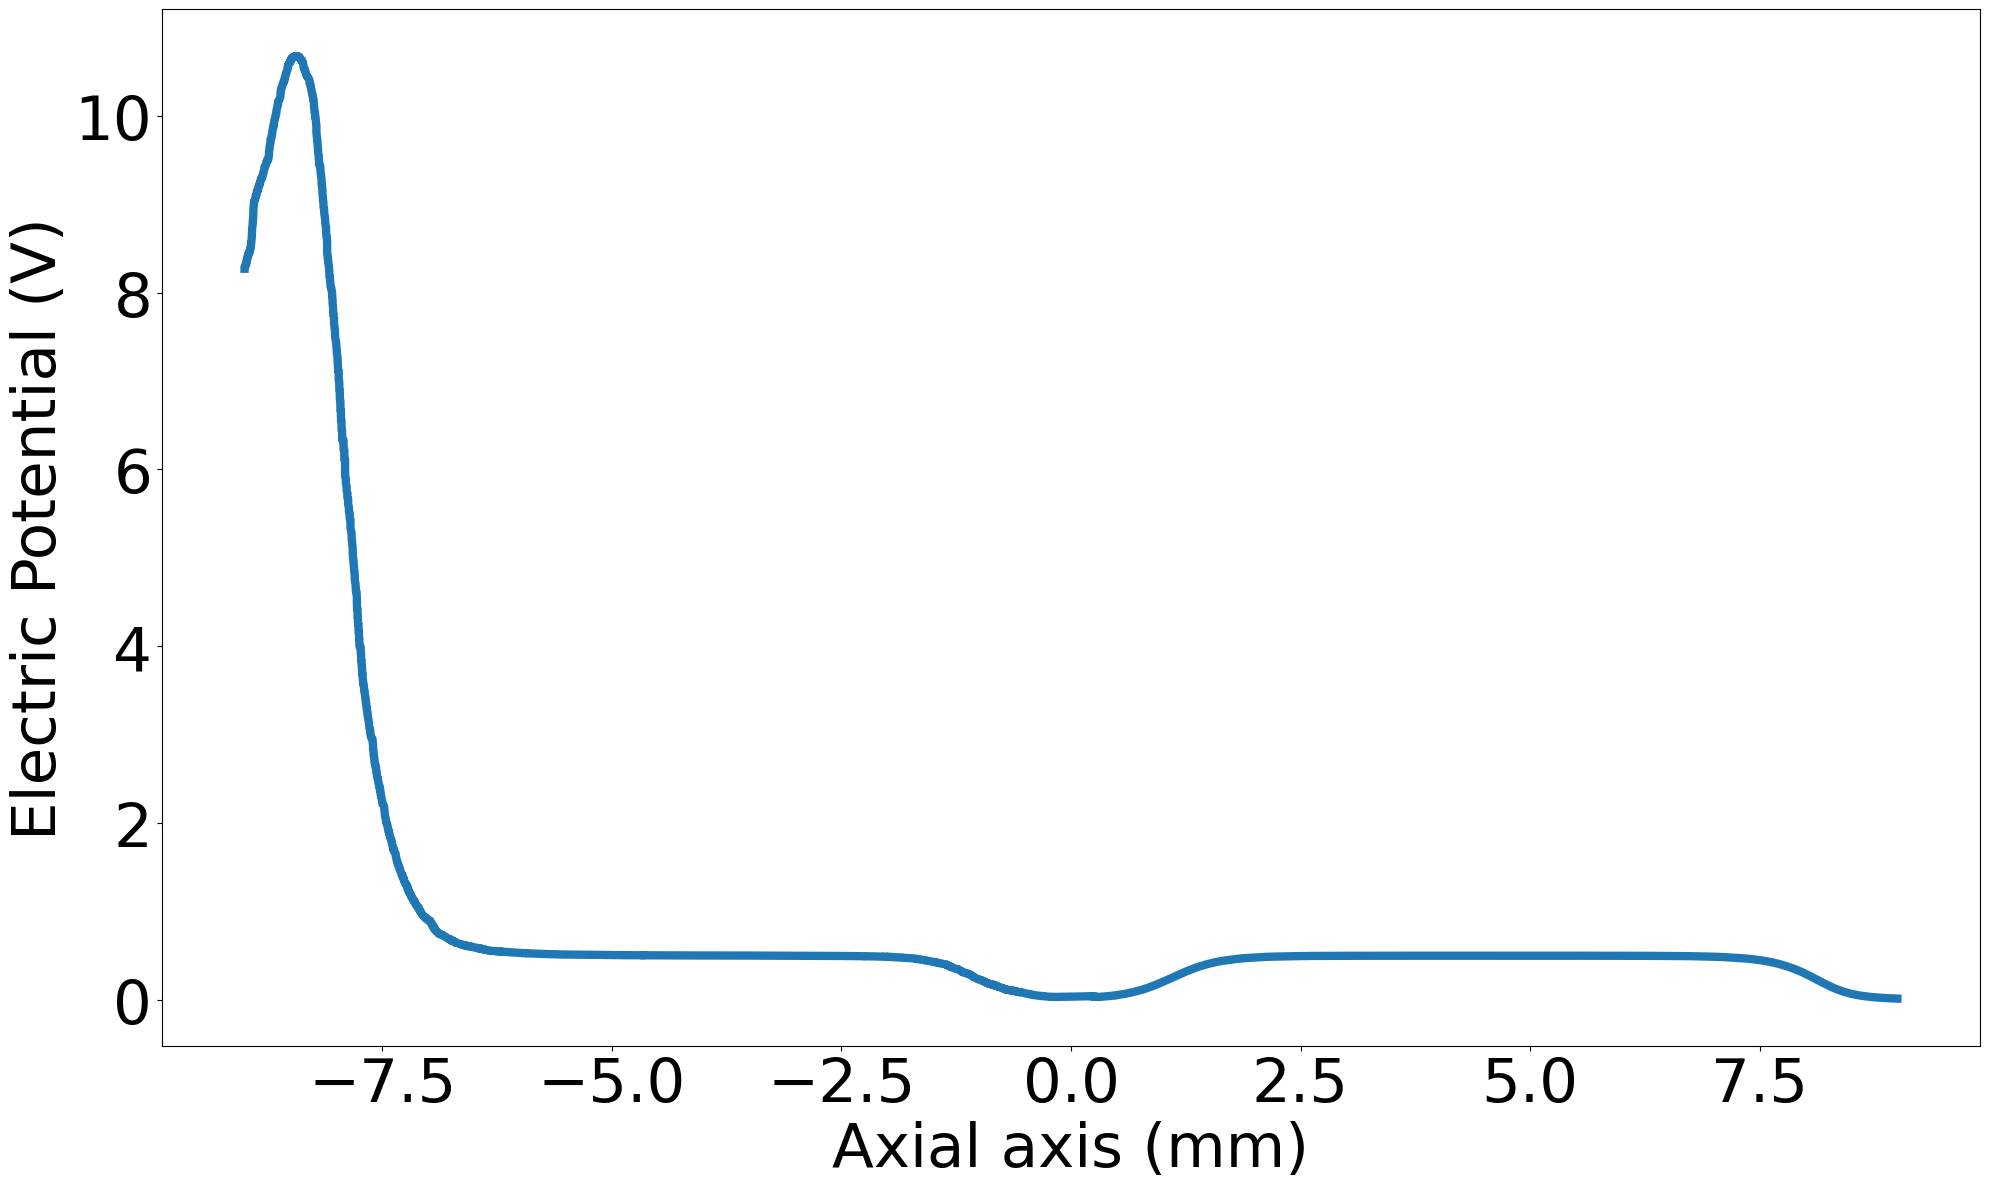

In [19]:
def set_potential2(V_EC_L, V_DC_L, V_BIAS, V_DC_R, V_EC_R):
    total_potential = (
        V_EC_R * electric_potential_EC_R +
        V_EC_L * electric_potential_EC_L +
        V_DC_R * electric_potential_DC_R +
        V_DC_L * electric_potential_DC_L +
        V_BIAS * electric_potential_BIAS
    )

    plt.figure(figsize=(20, 12))
    plt.plot(arc_length_DC-9.0, total_potential, label='Electric Potential', linewidth=6)

    #plt.title('Arc Length vs Electric Potential', fontsize=16, fontweight='bold')
    plt.xlabel('Axial axis (mm)', fontsize=44)
    plt.ylabel('Electric Potential (V)', fontsize=44)
    plt.xticks(fontsize=44)
    plt.yticks(fontsize=44)
    plt.tight_layout()
    plt.show()

set_potential2(V_EC_L=0,V_DC_L=10,V_BIAS=0,V_DC_R=10,V_EC_R=0)
set_potential2(V_EC_L=20,V_DC_L=0,V_BIAS=20,V_DC_R=0,V_EC_R=20)
set_potential2(V_EC_L=15,V_DC_L=1,V_BIAS=0,V_DC_R=1,V_EC_R=0)


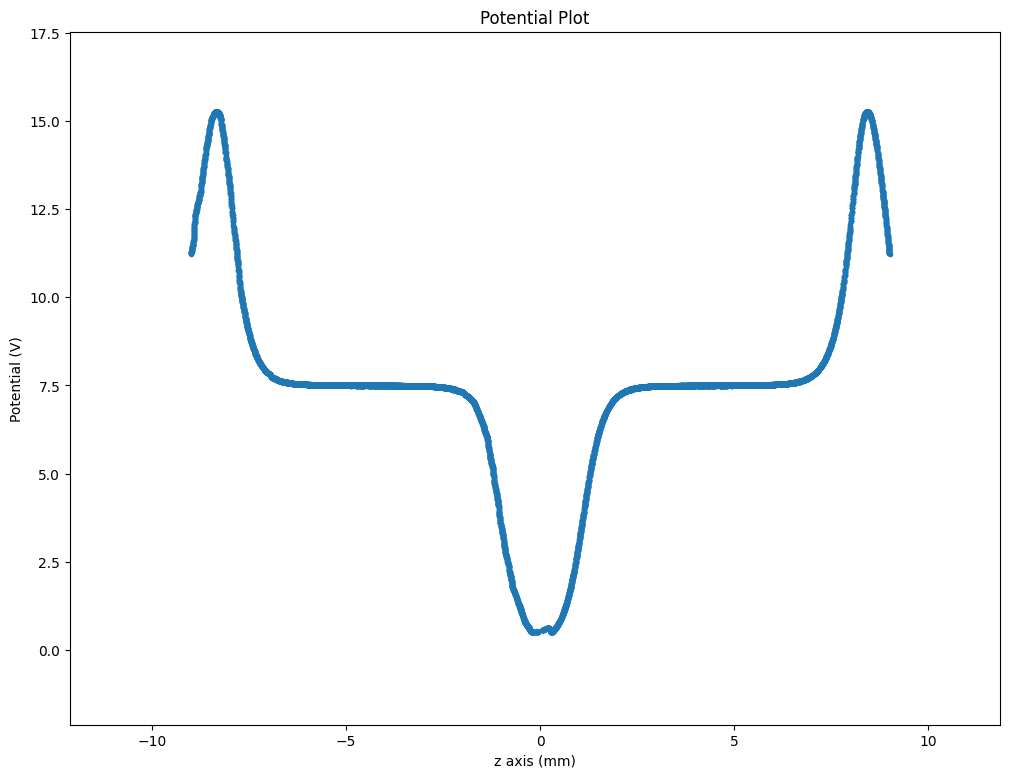

In [21]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Define the set_potential function
def set_potential(potentials):
    # Example function that generates data based on the potentials
    # Here, we simply return the potentials for plotting
    return potentials

# Function to update the potential and plot the result
def update_potential(index, value):
    potentials[index] = value
    data = set_potential(potentials)
    plot_data(data)

# Function to plot the data
def plot_data(data):
    total_potential = data[4]*electric_potential_EC_R + data[0]*electric_potential_EC_L + data[3]*electric_potential_DC_R + data[1]*electric_potential_DC_L + data[2]*electric_potential_BIAS
    ax.clear()
    ax.plot(arc_length_BIAS-9.0,total_potential, marker='.')
    ax.set_title("Potential Plot")
    ax.set_xlabel("z axis (mm)")
    ax.set_ylabel("Potential (V)")
    canvas.draw()

# Create the main window
root = tk.Tk()
root.title("Potential Control")

# Create a frame for the sliders
frame = ttk.Frame(root, padding="10")
frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

# Define the potentials
potentials = [0, 0, 0, 0, 0]

# Create sliders for each potential
for i in range(5):
    label = ttk.Label(frame, text=f"Potential {i+1}")
    label.grid(row=i, column=0, sticky=tk.W)
    
    slider = ttk.Scale(frame, from_=0, to=100, orient=tk.HORIZONTAL, command=lambda value, idx=i: update_potential(idx, int(float(value))))
    slider.grid(row=i, column=1, sticky=(tk.W, tk.E))
    
    value_label = ttk.Label(frame, text="0")
    value_label.grid(row=i, column=2, sticky=tk.W)
    
    slider.config(command=lambda value, idx=i, l=value_label: [update_potential(idx, int(float(value))), l.config(text=str(int(float(value))))])

# Configure column weights
frame.columnconfigure(1, weight=1)

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 9))
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().grid(row=1, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

# Add zoom functionality
def zoom(event):
    base_scale = 1.1
    cur_xlim = ax.get_xlim()
    cur_ylim = ax.get_ylim()
    xdata = event.xdata
    ydata = event.ydata
    if event.button == 'up':
        scale_factor = 1 / base_scale
    elif event.button == 'down':
        scale_factor = base_scale
    else:
        scale_factor = 1
    new_width = (cur_xlim[1] - cur_xlim[0]) * scale_factor
    new_height = (cur_ylim[1] - cur_ylim[0]) * scale_factor
    relx = (cur_xlim[1] - xdata) / (cur_xlim[1] - cur_xlim[0])
    rely = (cur_ylim[1] - ydata) / (cur_ylim[1] - cur_ylim[0])
    ax.set_xlim([xdata - new_width * (1 - relx), xdata + new_width * (relx)])
    ax.set_ylim([ydata - new_height * (1 - rely), ydata + new_height * (rely)])
    canvas.draw()

fig.canvas.mpl_connect('scroll_event', zoom)

# Start the main event loop
root.mainloop()